<a href="https://colab.research.google.com/github/KrishnenduGhorui/ML-Project-code/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Data collection

In [2]:
df_heart=pd.read_csv('Data_heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145.0,233.0,1,0,150.0,No,2.3,0,0,1,1
1,37,Male,2,130.0,250.0,0,1,187.0,No,3.5,0,0,2,1
2,41,Female,1,130.0,204.0,0,0,172.0,No,1.4,2,0,2,1
3,56,Male,1,120.0,236.0,0,1,178.0,No,0.8,2,0,2,1
4,57,Female,0,120.0,354.0,0,1,163.0,Yes,0.6,2,0,2,1


In [3]:
df_heart.shape

(303, 14)

In [4]:
df_heart.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,298.000000,296.000000,303.000000,303.000000,297.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.718121,246.956081,0.148515,0.528053,149.962963,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.643908,51.690947,0.356198,0.525860,22.762329,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.750000,0.000000,0.000000,136.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,241.500000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df_heart.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  298 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   297 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


##### Observing two object typed fetaure present 'sex' and 'exang', so those are categorical, that to be encoded 

### Data pre-processing 

#### Missing value handling 

In [6]:
# Getting percentage of missing value in all featurse ,feature containing very high missing to be droped 
df_heart.isnull().mean()*100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    1.650165
chol        2.310231
fbs         0.000000
restecg     0.000000
thalach     1.980198
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.000000
thal        0.000000
target      0.000000
dtype: float64

###### Very less percentage of data missing for features, so no need to remove any feature becuse of missing value

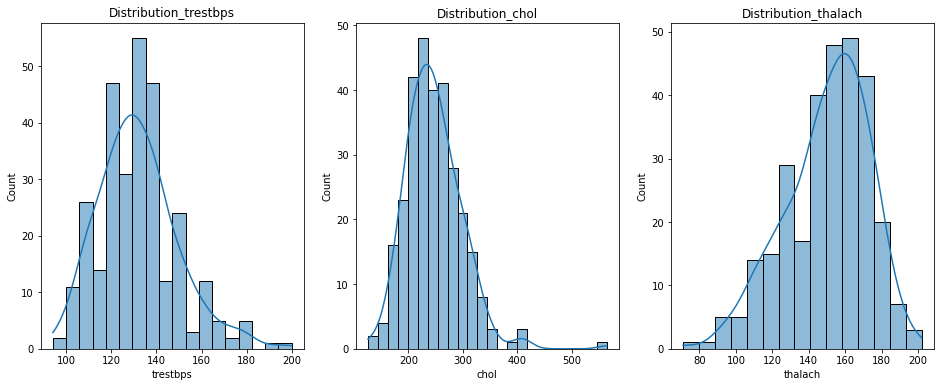

In [7]:
cols_missingData=['trestbps','chol','thalach']
plt.figure(figsize=(16,6))
for i,col in enumerate(cols_missingData):
    plt.subplot(1,3,i+1)
    sns.histplot(df_heart[col],kde=True)
    plt.title('Distribution_'+col)
    plt.plot()

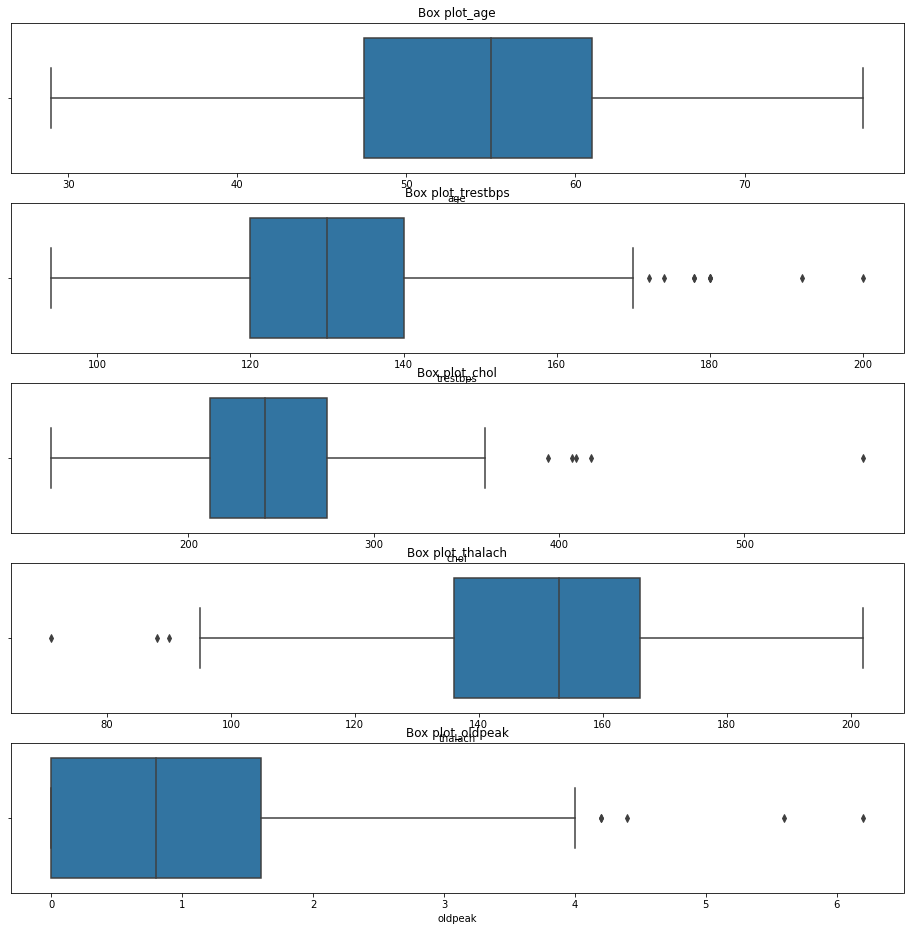

In [8]:
# Showing box plots for checking if any outlier there in fetaure 
cols_continuousData=['age','trestbps','chol','thalach','oldpeak']
plt.figure(figsize=(16,16))
for i,col in enumerate(cols_continuousData):
    plt.subplot(len(cols_continuousData),1,i+1)
    sns.boxplot(x=df_heart[col])     
    plt.title('Box plot_'+col)
    plt.plot()

In [9]:
indx_trestbps_missing=df_heart.trestbps[df_heart.trestbps.isnull()].index
indx_chol_missing=df_heart.chol[df_heart.chol.isnull()].index
indx_thalach_missing=df_heart.thalach[df_heart.thalach.isnull()].index

print(df_heart.trestbps[indx_trestbps_missing])
print(df_heart.chol[indx_chol_missing])
print(df_heart.thalach[indx_thalach_missing])

40    NaN
129   NaN
198   NaN
282   NaN
296   NaN
Name: trestbps, dtype: float64
13    NaN
25    NaN
53    NaN
139   NaN
159   NaN
209   NaN
286   NaN
Name: chol, dtype: float64
106   NaN
139   NaN
213   NaN
274   NaN
283   NaN
298   NaN
Name: thalach, dtype: float64


In [10]:
# Mean values of fetaures before imputation 
print([df_heart.trestbps.mean(), df_heart.chol.mean(),df_heart.thalach.mean()])

[131.71812080536913, 246.9560810810811, 149.96296296296296]


In [11]:
# Imputing missing value with corresponding mean value 

from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
df_heart[cols_missingData]=np.round(si.fit_transform(df_heart[cols_missingData]),2)
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Just checking if imputation done with mean value of features separatly

print(df_heart.trestbps[indx_trestbps_missing])
print(df_heart.chol[indx_chol_missing])
print(df_heart.thalach[indx_thalach_missing])

40     131.72
129    131.72
198    131.72
282    131.72
296    131.72
Name: trestbps, dtype: float64
13     246.96
25     246.96
53     246.96
139    246.96
159    246.96
209    246.96
286    246.96
Name: chol, dtype: float64
106    149.96
139    149.96
213    149.96
274    149.96
283    149.96
298    149.96
Name: thalach, dtype: float64


#### Outlier handling 

In [13]:
# Defining method for replacing outlier with other valid value 

def outlier_replace_u(feature):
    q1=np.quantile(feature,.25)
    q3=np.quantile(feature,.75)
    IQR=q3-q1
    ul=q3+1.5*IQR
    feature[feature>ul]=np.quantile(feature,.95)
    return feature

def outlier_replace_l(feature):
    q1=np.quantile(feature,.25)
    q3=np.quantile(feature,.75)
    IQR=q3-q1
    ll=q1-1.5*IQR
    feature[feature<ll]=np.quantile(feature,.05)
    return feature    

In [14]:
# replacing outlier with other value

df_heart.trestbps=outlier_replace_u(df_heart.trestbps)
df_heart.chol=outlier_replace_u(df_heart.chol)
df_heart.oldpeak=outlier_replace_u(df_heart.oldpeak)
df_heart.thalach=outlier_replace_l(df_heart.thalach)

C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_13956/3217522986.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[feature>ul]=np.quantile(feature,.95)
C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_13956/3217522986.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[feature<ll]=np.quantile(feature,.05)


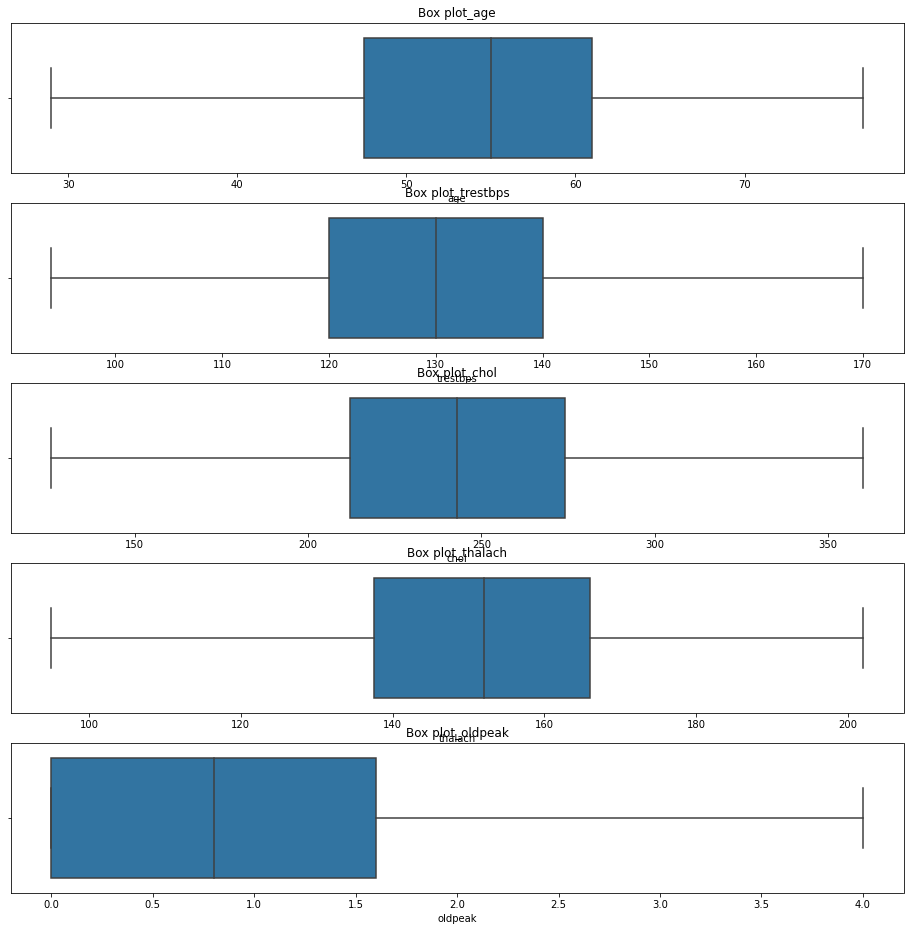

In [15]:
# Seeing boxplot to check outlier's existance after outlier handling 

plt.figure(figsize=(16,16))
for i,col in enumerate(cols_continuousData):
    plt.subplot(len(cols_continuousData),1,i+1)
    sns.boxplot(x=df_heart[col])     
    plt.title('Box plot_'+col)
    plt.plot()

In [16]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145.0,233.0,1,0,150.0,No,2.3,0,0,1,1
1,37,Male,2,130.0,250.0,0,1,187.0,No,3.5,0,0,2,1
2,41,Female,1,130.0,204.0,0,0,172.0,No,1.4,2,0,2,1
3,56,Male,1,120.0,236.0,0,1,178.0,No,0.8,2,0,2,1
4,57,Female,0,120.0,354.0,0,1,163.0,Yes,0.6,2,0,2,1


**Encoding** 

In [17]:
print(df_heart.sex.unique())
print(df_heart.exang.unique())

['Male' 'Female']
['No' 'Yes']


In [18]:
# Perform OneHotEncoding on Age feature

df_heart['sex']=pd.get_dummies(df_heart['sex'],drop_first=True)
# Perform mapping on exang feature , No to 0 and yes to 1

df_heart['exang']=df_heart['exang'].map({'No':0,'Yes':1})
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


**Visualisation of data**

[]

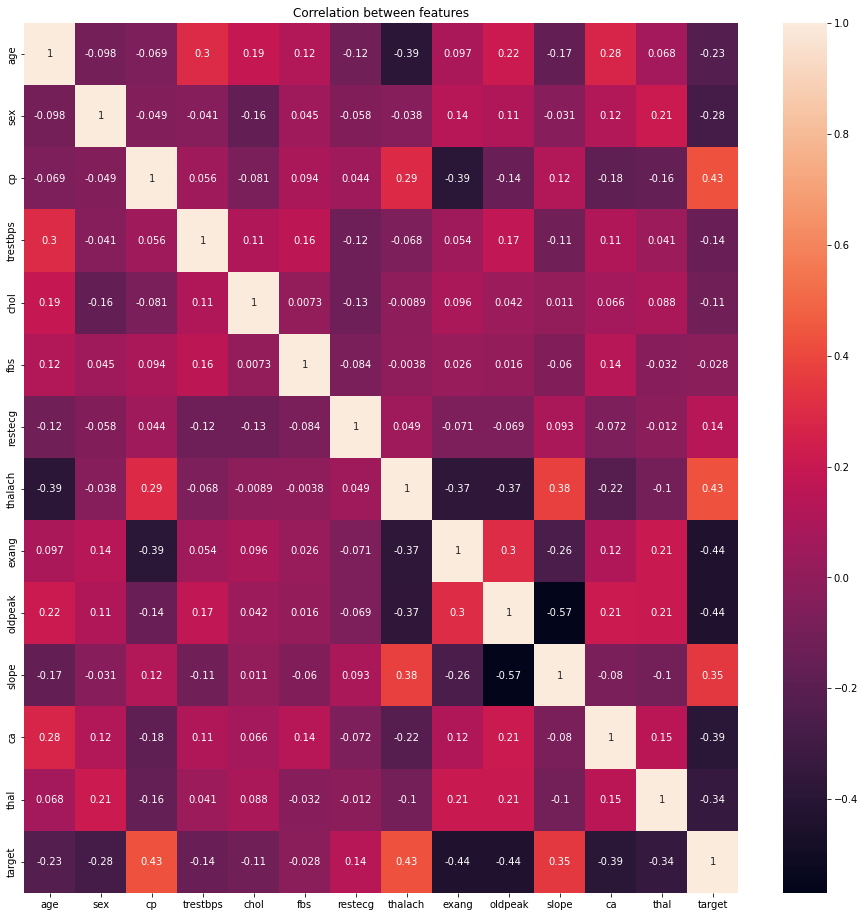

In [19]:
# Visualising correlation through Heatmap
plt.figure(figsize=(16,16))
sns.heatmap(df_heart.corr(),annot=True)
plt.title('Correlation between features')
plt.plot()

[]

<Figure size 1152x1152 with 0 Axes>

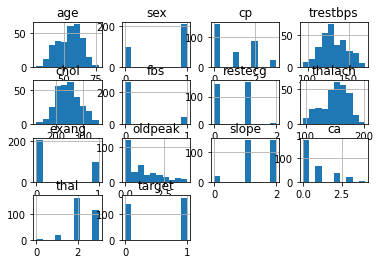

In [20]:
plt.figure(figsize=(16,16))
df_heart.hist()
plt.title('h')
plt.plot()

[]

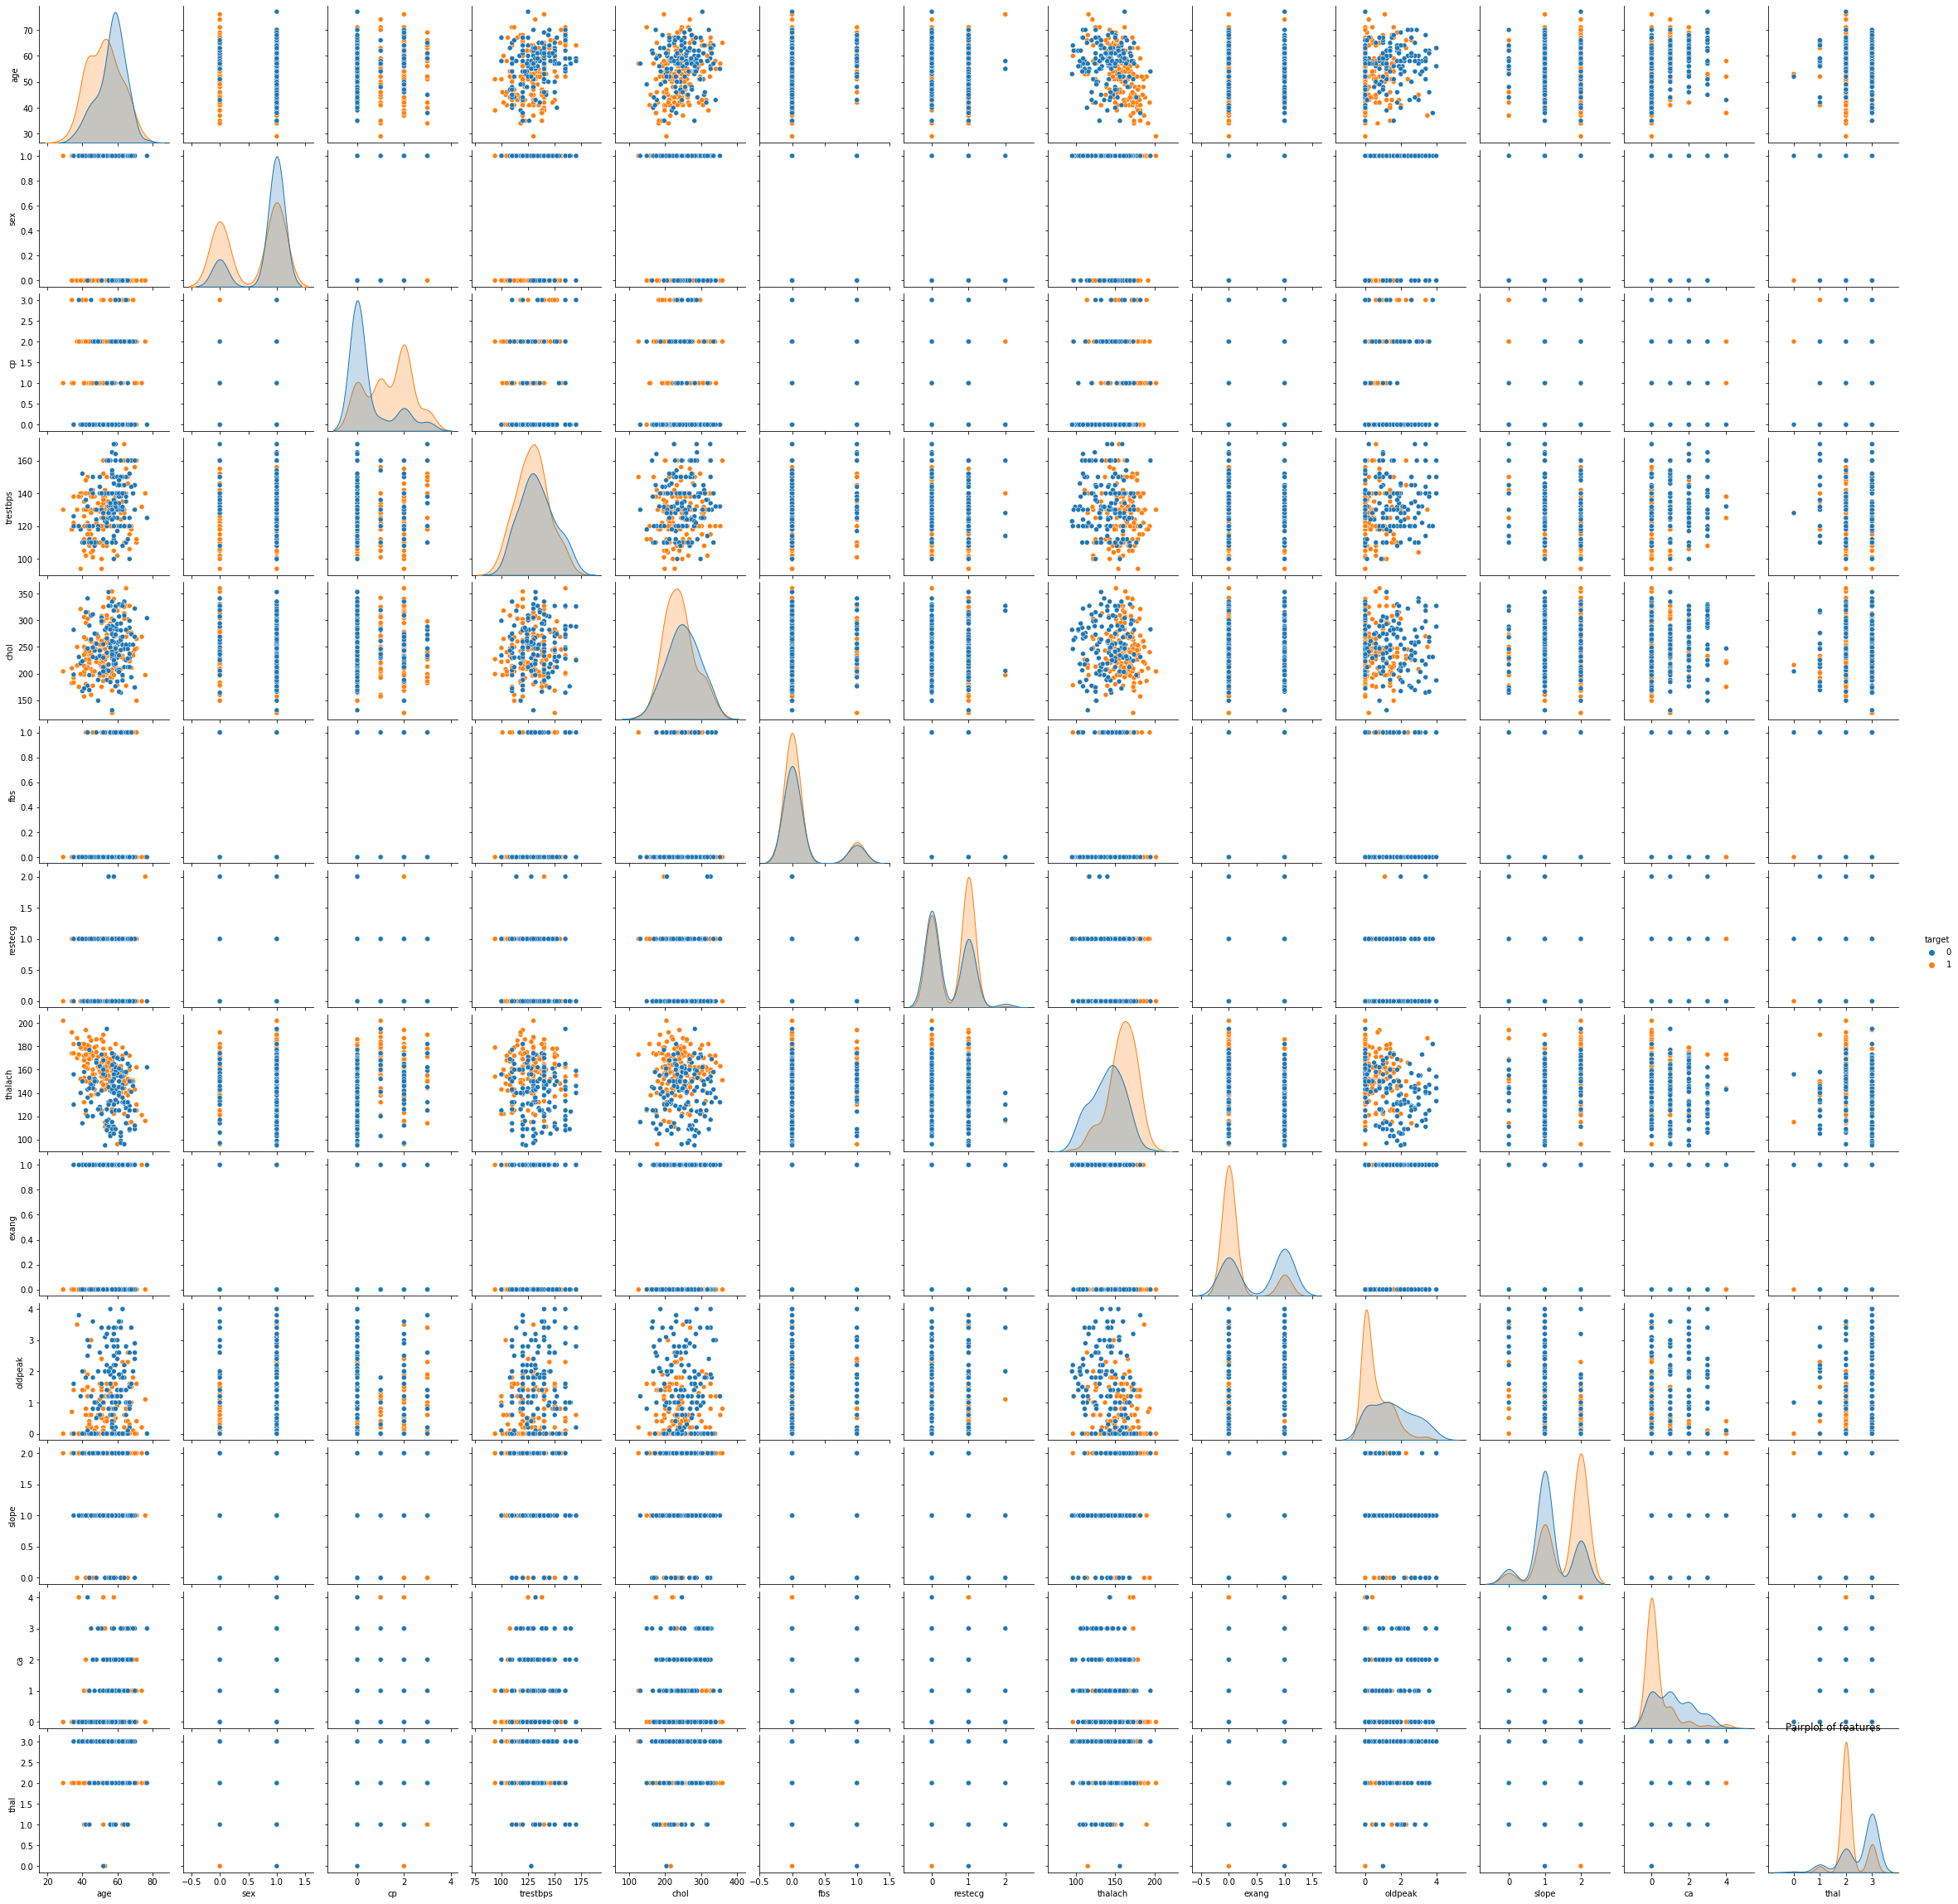

In [21]:
# Visualising mutual relation between each feature 
sns.pairplot(df_heart,hue='target')
plt.title('Pairplot of features')
plt.plot()

0    138
1    165
Name: target, dtype: int64


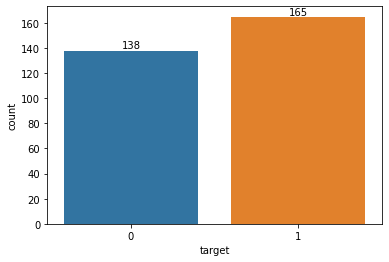

In [22]:
# Checking whole data balanced or imbalanced 
targetValCount=df_heart['target'].value_counts(ascending=True)
print(targetValCount)
sns.countplot(x=df_heart['target'])
for pos,val in enumerate(targetValCount):
    plt.text(pos,val,val,ha='center',va='bottom') 

##### It is almost balanced data 

In [23]:
# Getting independant/input data and target data
x=df_heart.iloc[:,:-1]
y=df_heart.iloc[:,-1]
print('x \n',x)
print('y \n',y)

x 
      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3     145.0  233.0    1        0   150.00      0      2.3   
1     37    1   2     130.0  250.0    0        1   187.00      0      3.5   
2     41    0   1     130.0  204.0    0        0   172.00      0      1.4   
3     56    1   1     120.0  236.0    0        1   178.00      0      0.8   
4     57    0   0     120.0  354.0    0        1   163.00      1      0.6   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
298   57    0   0     140.0  241.0    0        1   149.96      1      0.2   
299   45    1   3     110.0  264.0    0        1   132.00      0      1.2   
300   68    1   0     144.0  193.0    1        1   141.00      0      3.4   
301   57    1   0     130.0  131.0    0        1   115.00      1      1.2   
302   57    0   1     130.0  236.0    0        0   174.00      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2 

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=1)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


#### Standard Scaling 

In [26]:
# Performing standard scaling to bring some feature in same range 
from sklearn.preprocessing import StandardScaler
cols_to_scaled=['age','trestbps','chol','thalach','oldpeak']
sc_age=StandardScaler()
sc_trestbps=StandardScaler()
sc_chol=StandardScaler()
sc_thalach=StandardScaler()
sc_oldpeak=StandardScaler()

x_train['age']=sc_age.fit_transform(x_train['age'].values.reshape(-1,1))
x_test['age']=sc_age.transform(x_test['age'].values.reshape(-1,1))

x_train['trestbps']=sc_trestbps.fit_transform(x_train['trestbps'].values.reshape(-1,1))
x_test['trestbps']=sc_trestbps.transform(x_test['trestbps'].values.reshape(-1,1))

x_train['chol']=sc_chol.fit_transform(x_train['chol'].values.reshape(-1,1))
x_test['chol']=sc_chol.transform(x_test['chol'].values.reshape(-1,1))

x_train['thalach']=sc_thalach.fit_transform(x_train['thalach'].values.reshape(-1,1))
x_test['thalach']=sc_thalach.transform(x_test['thalach'].values.reshape(-1,1))

x_train['oldpeak']=sc_oldpeak.fit_transform(x_train['oldpeak'].values.reshape(-1,1))
x_test['oldpeak']=sc_oldpeak.transform(x_test['oldpeak'].values.reshape(-1,1))

C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_13956/246198007.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['age']=sc_age.fit_transform(x_train['age'].values.reshape(-1,1))
C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_13956/246198007.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['age']=sc_age.transform(x_test['age'].values.reshape(-1,1))
C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_13956/246198007.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
62,-0.270906,1,3,-0.805770,-1.350497,0,0,1.772254,0,-0.966732,1,0,1
127,1.370810,0,2,1.315872,0.726747,0,1,0.967272,0,-0.966732,2,1,2
111,0.276333,1,2,1.191070,-2.720109,1,1,1.011993,0,-0.774022,2,1,3
287,0.276333,1,1,1.440675,-0.300462,0,0,0.609502,0,-0.966732,2,1,2
108,-0.489801,0,1,-0.680968,-0.026540,0,1,0.520060,0,0.093169,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1.480258,1,2,1.815082,0.658266,1,0,-0.016595,1,0.574943,1,0,3
255,-1.037040,1,0,0.691860,1.457206,0,0,-0.150759,1,-0.966732,1,3,3
72,-2.788203,1,1,-0.056955,-0.939614,0,0,2.308909,0,-0.966732,2,0,2
235,-0.380353,1,0,0.567057,1.228938,0,1,1.011993,1,0.574943,2,0,3


In [28]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
204,0.823571,0,0,1.815082,-1.852688,0,0,-0.240201,0,2.309326,0,3,3
159,0.166885,1,1,-0.056955,0.041028,0,0,0.564781,0,-0.966732,2,0,3
219,-0.708697,1,0,-0.056955,0.247383,1,0,-0.016595,1,-0.966732,2,2,3
174,0.604676,1,0,-0.056955,-0.893960,0,0,-0.821577,1,1.345780,1,2,3
184,-0.489801,1,0,1.191070,-0.049366,0,0,-1.000462,0,1.538489,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.933019,1,3,0.879063,-0.277635,1,0,-0.016595,0,1.249425,0,0,1
288,0.276333,1,0,-1.304980,2.050704,0,1,-0.329644,1,1.923908,1,1,3
259,-1.803174,1,3,-0.680968,-0.323289,0,1,1.414485,1,2.694745,1,0,3
179,0.276333,1,0,1.191070,0.703920,0,0,-1.716002,1,-0.388604,1,1,1


### ML Model Training and Evaluation

In [29]:
# Defining a method for model's performance evaluation

def model_evaluation(y_test,y_pred,name_mlAlgo='Machine Learning'):
    from sklearn.metrics import confusion_matrix,classification_report
    cm=confusion_matrix(y_test,y_pred)
    print('Evaluation of ',name_mlAlgo,' model -')
    report=classification_report(y_test,y_pred)
    print(report)
    sns.heatmap(cm,annot=True)
    plt.title('Confusion matrix of '+name_mlAlgo+' model')
    plt.plot()

### Support vector Classifier 

In [30]:
# Hyper parameter tuning

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

svc_sample=SVC()
parameters={'C':[1,0.8,0.6,0.5,0.3,0.1,1.5,2,2.5,3,4],'kernel':['poly','rbf'],'gamma':[1,0.9,0.8]}
rscv_svc=RandomizedSearchCV(estimator=svc_sample,param_distributions=parameters,cv=6,n_jobs=-1)
rscv_svc.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 0.8, 0.6, 0.5, 0.3, 0.1, 1.5,
                                              2, 2.5, 3, 4],
                                        'gamma': [1, 0.9, 0.8],
                                        'kernel': ['poly', 'rbf']})

In [31]:
print(rscv_svc.best_score_)
print(rscv_svc.best_params_)

0.7975609756097563
{'kernel': 'poly', 'gamma': 1, 'C': 0.1}


In [32]:
RandomSearchCVResult_svc=pd.DataFrame(rscv_svc.cv_results_)
RandomSearchCVResult_svc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013468,0.001254,0.004814,0.001673,poly,1,0.1,"{'kernel': 'poly', 'gamma': 1, 'C': 0.1}",0.780488,0.804878,0.800,0.775,0.800,0.825,0.797561,0.016426,1
1,0.016628,0.003341,0.006811,0.002963,poly,0.9,0.8,"{'kernel': 'poly', 'gamma': 0.9, 'C': 0.8}",0.780488,0.804878,0.800,0.775,0.800,0.825,0.797561,0.016426,1
2,0.016449,0.003372,0.007481,0.002212,rbf,0.9,0.1,"{'kernel': 'rbf', 'gamma': 0.9, 'C': 0.1}",0.560976,0.560976,0.550,0.550,0.550,0.550,0.553659,0.005174,9
3,0.019294,0.005476,0.010463,0.006037,rbf,0.9,1,"{'kernel': 'rbf', 'gamma': 0.9, 'C': 1}",0.658537,0.682927,0.800,0.650,0.675,0.675,0.690244,0.050315,7
4,0.017451,0.003584,0.013797,0.010514,rbf,0.8,1.5,"{'kernel': 'rbf', 'gamma': 0.8, 'C': 1.5}",0.829268,0.780488,0.875,0.700,0.750,0.750,0.780793,0.057226,5
5,0.019448,0.008897,0.006314,0.004632,poly,1,0.6,"{'kernel': 'poly', 'gamma': 1, 'C': 0.6}",0.780488,0.804878,0.800,0.775,0.800,0.825,0.797561,0.016426,1
6,0.017952,0.009871,0.010470,0.004489,rbf,0.8,3,"{'kernel': 'rbf', 'gamma': 0.8, 'C': 3}",0.829268,0.780488,0.875,0.700,0.750,0.750,0.780793,0.057226,5
7,0.013466,0.002056,0.005151,0.004404,poly,1,0.5,"{'kernel': 'poly', 'gamma': 1, 'C': 0.5}",0.780488,0.804878,0.800,0.775,0.800,0.825,0.797561,0.016426,1
8,0.012117,0.002676,0.008316,0.002281,rbf,1,0.8,"{'kernel': 'rbf', 'gamma': 1, 'C': 0.8}",0.585366,0.634146,0.600,0.575,0.600,0.575,0.594919,0.020311,8
9,0.010806,0.001343,0.005649,0.000740,rbf,0.9,0.6,"{'kernel': 'rbf', 'gamma': 0.9, 'C': 0.6}",0.560976,0.560976,0.550,0.550,0.550,0.550,0.553659,0.005174,9


In [33]:
# Support vector classifier model training with optimized parameters

svc_model=SVC(C=1,kernel='poly',gamma=0.8)
svc_model.fit(x_train,y_train)

SVC(C=1, gamma=0.8, kernel='poly')

Evaluation of  Support Vector Classifier  model -
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.70      0.84      0.76        31

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



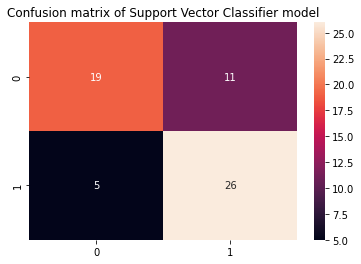

In [34]:
y_pred_svc=svc_model.predict(x_test)
model_evaluation(y_test,y_pred=y_pred_svc,name_mlAlgo='Support Vector Classifier')

### K-nearest neighbors classifier 

In [35]:
# Hyper parameter tuning

from sklearn.neighbors import KNeighborsClassifier
knnc_sample=KNeighborsClassifier()
parameters_knnc=[{'n_neighbors':range(4,20)}]
rscv_knnc=RandomizedSearchCV(estimator=knnc_sample,param_distributions=parameters_knnc,cv=6,n_jobs=-1)
rscv_knnc.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions=[{'n_neighbors': range(4, 20)}])

In [36]:
print(rscv_knnc.best_score_)
print(rscv_knnc.best_params_)

0.8310975609756097
{'n_neighbors': 18}


In [37]:
RandomSearchCVResult_knnc=pd.DataFrame(rscv_knnc.cv_results_)
RandomSearchCVResult_knnc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012798,0.012342,0.014129,0.008050,16,{'n_neighbors': 16},0.829268,0.682927,0.900,0.700,0.950,0.875,0.822866,0.099625,6
1,0.007479,0.001974,0.009475,0.001973,4,{'n_neighbors': 4},0.780488,0.682927,0.925,0.800,0.900,0.875,0.827236,0.082549,2
2,0.007646,0.003438,0.015292,0.005359,12,{'n_neighbors': 12},0.829268,0.707317,0.925,0.750,0.900,0.850,0.826931,0.077158,4
3,0.008141,0.002539,0.011303,0.003850,8,{'n_neighbors': 8},0.780488,0.731707,0.875,0.800,0.900,0.875,0.827033,0.060429,3
4,0.009144,0.005799,0.009474,0.002285,9,{'n_neighbors': 9},0.829268,0.707317,0.900,0.750,0.875,0.850,0.818598,0.068309,7
5,0.008967,0.003696,0.007983,0.001415,11,{'n_neighbors': 11},0.804878,0.731707,0.900,0.750,0.850,0.850,0.814431,0.059074,9
6,0.009807,0.002261,0.009644,0.002685,10,{'n_neighbors': 10},0.829268,0.707317,0.900,0.750,0.825,0.850,0.810264,0.063822,10
7,0.006651,0.002354,0.012794,0.002030,6,{'n_neighbors': 6},0.756098,0.658537,0.925,0.750,0.950,0.900,0.823272,0.107482,5
8,0.007157,0.002338,0.010629,0.003854,15,{'n_neighbors': 15},0.804878,0.707317,0.900,0.700,0.925,0.850,0.814533,0.087055,8
9,0.008976,0.004307,0.014294,0.002280,18,{'n_neighbors': 18},0.829268,0.707317,0.900,0.725,0.950,0.875,0.831098,0.088877,1


In [38]:
knnc_model=KNeighborsClassifier(n_neighbors=7)
knnc_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

Evaluation of  K-nearest neighbors classifier  model -
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



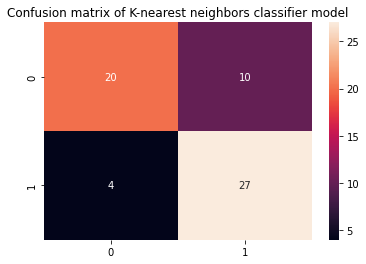

In [39]:
y_pred_knnc=knnc_model.predict(x_test)
model_evaluation(y_test,y_pred=y_pred_knnc,name_mlAlgo='K-nearest neighbors classifier')

### Random Forest Classifier 

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc_sample=RandomForestClassifier()

In [41]:
# Hyper parameter Tuning 
parameters_rfc={'n_estimators':range(50,200),'criterion':['gini','entropy'],'max_depth':range(10,40)}
rscv_rfc=RandomizedSearchCV(estimator=rfc_sample,param_distributions=parameters_rfc,cv=6,n_jobs=-1)
rscv_rfc.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(10, 40),
                                        'n_estimators': range(50, 200)})

In [42]:
print(rscv_rfc.best_score_)
print(rscv_rfc.best_params_)

0.8682926829268293
{'n_estimators': 51, 'max_depth': 29, 'criterion': 'gini'}


In [43]:
randomSearchCVResult_rfc=pd.DataFrame(rscv_rfc.cv_results_)
randomSearchCVResult_rfc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.303414,0.009417,0.026096,0.004438,78,10,gini,"{'n_estimators': 78, 'max_depth': 10, 'criteri...",0.804878,0.731707,0.900,0.775,0.950,0.900,0.843598,0.077898,4
1,0.201432,0.009041,0.018252,0.002404,51,29,gini,"{'n_estimators': 51, 'max_depth': 29, 'criteri...",0.853659,0.756098,0.925,0.800,0.975,0.900,0.868293,0.074244,1
2,0.332919,0.015598,0.023634,0.004285,118,11,gini,"{'n_estimators': 118, 'max_depth': 11, 'criter...",0.804878,0.731707,0.925,0.775,0.975,0.850,0.843598,0.084319,4
3,0.275709,0.055194,0.029319,0.008537,78,38,entropy,"{'n_estimators': 78, 'max_depth': 38, 'criteri...",0.804878,0.682927,0.925,0.750,0.975,0.875,0.835467,0.100463,8
4,0.425650,0.054817,0.029477,0.004508,114,14,gini,"{'n_estimators': 114, 'max_depth': 14, 'criter...",0.829268,0.731707,0.925,0.775,0.950,0.900,0.851829,0.079742,2
5,0.197635,0.010703,0.016784,0.003320,64,38,gini,"{'n_estimators': 64, 'max_depth': 38, 'criteri...",0.780488,0.707317,0.925,0.775,0.950,0.875,0.835467,0.087367,8
6,0.455413,0.021823,0.039045,0.004267,116,15,gini,"{'n_estimators': 116, 'max_depth': 15, 'criter...",0.829268,0.707317,0.925,0.800,0.950,0.850,0.843598,0.080278,4
7,0.279448,0.008073,0.021942,0.003101,66,29,entropy,"{'n_estimators': 66, 'max_depth': 29, 'criteri...",0.780488,0.756098,0.925,0.800,0.950,0.875,0.847764,0.073450,3
8,0.398820,0.059906,0.031582,0.010100,101,35,gini,"{'n_estimators': 101, 'max_depth': 35, 'criter...",0.804878,0.682927,0.900,0.800,0.950,0.850,0.831301,0.084510,10
9,0.185355,0.026000,0.018783,0.006105,55,13,gini,"{'n_estimators': 55, 'max_depth': 13, 'criteri...",0.829268,0.707317,0.925,0.750,0.950,0.875,0.839431,0.087909,7


In [44]:
rfc_model=RandomForestClassifier(n_estimators=96,max_depth=25,criterion='gini')
rfc_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=96)

Evaluation of  Random forest classifier  model -
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



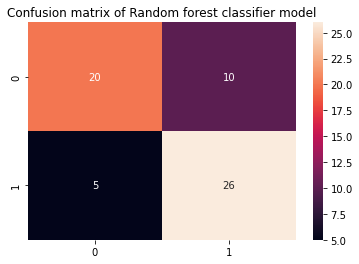

In [45]:
y_pred_rfc=rfc_model.predict(x_test)
model_evaluation(y_test,y_pred=y_pred_rfc,name_mlAlgo='Random forest classifier')

##### So, from above , k-nearest neighbors classifier model is giving highest accuracy. 

In [ ]:
import pickle 

pickle.dump(knnc_model,open('knnc_model.pickle','wb'))
pickle.dump(sc_age,open('sc_age.pickle','wb'))
pickle.dump(sc_trestbps,open('sc_trestbps.pickle','wb'))
pickle.dump(sc_chol,open('sc_chol.pickle','wb'))
pickle.dump(sc_thalach,open('sc_thalach.pickle','wb'))
pickle.dump(sc_oldpeak,open('sc_oldpeak.pickle','wb'))